In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

plots_path = "plots"

### Validation runs scoring

In [17]:
# read in data
agg_data = pd.read_csv("../data/inference_results/val_runs_scoring/scoring_results.csv", sep=";")
agg_data_without_zero_labels = pd.read_csv("../data/inference_results/val_runs_scoring/scoring_results_without_zero_labels.csv", sep=";")
# add display names and rounding
for df in [agg_data, agg_data_without_zero_labels]:
    df["display_name"] = ["Llama3-8B-Instruct-ft-A-guided", 
                                "Llama3-8B-Instruct-ft-A-unguided", 
                                "Llama3-8B-Instruct-ft-B-guided", 
                                "Llama3-8B-Instruct-ft-B-unguided",
                                "Llama3-8B-Instruct-base-guided",
                                "Llama3-8B-Instruct-base-unguided",
                                "Mistral-7B-Instruct-v0.2-base-guided",
                                "Mistral-7B-Instruct-v0.2-base-unguided"]
    df["short_display_name"] = ["Llama3-A-guided", 
                                "Llama3-A-unguided", 
                                "Llama3-B-guided", 
                                "Llama3-B-unguided",
                                "Llama3-base-guided",
                                "Llama3-base-unguided",
                                "Mistral-base-guided",
                                "Mistral-base-unguided"]
    # define display order
    df["display_order"] = [6, 5, 8, 7, 4, 3, 2, 1]
    # rounding
    df["mean_score_0.33"] = df["mean_score_0.33"].round(3).astype(str)
    df["mean_score_0.5"] = df["mean_score_0.5"].round(3).astype(str)
    df["mean_score_0.67"] = df["mean_score_0.67"].round(3).astype(str)
    df["invalid_output_rate"] = df["invalid_output_rate"].round(3).astype(str)


In [18]:
# columns to display
display_columns = ["short_display_name", "mean_score_0.33", "mean_score_0.5", "mean_score_0.67", "invalid_output_rate", "n_correct_names", "n_correct_asset_types",	"n_correct_sentiments",	"n_mistakes",	"n_extra_neutrals"]
# table too big -> split into two sections
display_columns_1 = ["short_display_name", "mean_score_0.33", "mean_score_0.5", "mean_score_0.67", "invalid_output_rate"]
display_columns_2 = ["short_display_name", "n_correct_names", "n_correct_asset_types",	"n_correct_sentiments",	"n_mistakes",	"n_extra_neutrals"]


In [15]:
agg_data.sort_values("display_order")[display_columns]

,short_display_name,mean_score_0.33,mean_score_0.5,mean_score_0.67,invalid_output_rate,n_correct_names,n_correct_asset_types,n_correct_sentiments,n_mistakes,n_extra_neutrals
7,Mistral-base-unguided,0.666,0.515,0.364,0.087,28,28,22,7,7
6,Mistral-base-guided,0.674,0.537,0.401,0.0,78,77,57,13,30
5,Llama3-base-unguided,0.552,0.465,0.379,0.133,85,84,71,47,69
4,Llama3-base-guided,0.543,0.475,0.408,0.0,117,115,100,75,83
1,Llama3-A-unguided,0.702,0.559,0.416,0.0,63,63,62,4,0
0,Llama3-A-guided,0.701,0.557,0.413,0.0,61,61,60,3,1
3,Llama3-B-unguided,0.677,0.562,0.447,0.0,97,95,85,18,5
2,Llama3-B-guided,0.681,0.565,0.449,0.0,97,95,85,17,6


In [14]:
print(agg_data.sort_values("display_order")[display_columns_1].to_latex(index=False))
print(agg_data.sort_values("display_order")[display_columns_2].to_latex(index=False))


\begin{tabular}{lllll}
\toprule
short_display_name & mean_score_0.33 & mean_score_0.5 & mean_score_0.67 & invalid_output_rate \\
\midrule
Mistral-base-unguided & 0.666 & 0.515 & 0.364 & 0.087 \\
Mistral-base-guided & 0.674 & 0.537 & 0.401 & 0.0 \\
Llama3-base-unguided & 0.552 & 0.465 & 0.379 & 0.133 \\
Llama3-base-guided & 0.543 & 0.475 & 0.408 & 0.0 \\
Llama3-A-unguided & 0.702 & 0.559 & 0.416 & 0.0 \\
Llama3-A-guided & 0.701 & 0.557 & 0.413 & 0.0 \\
Llama3-B-unguided & 0.677 & 0.562 & 0.447 & 0.0 \\
Llama3-B-guided & 0.681 & 0.565 & 0.449 & 0.0 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrrr}
\toprule
short_display_name & n_correct_names & n_correct_asset_types & n_correct_sentiments & n_mistakes & n_extra_neutrals \\
\midrule
Mistral-base-unguided & 28 & 28 & 22 & 7 & 7 \\
Mistral-base-guided & 78 & 77 & 57 & 13 & 30 \\
Llama3-base-unguided & 85 & 84 & 71 & 47 & 69 \\
Llama3-base-guided & 117 & 115 & 100 & 75 & 83 \\
Llama3-A-unguided & 63 & 63 & 62 & 4 & 0 \\
Llama3-A-guided &

In [21]:
print(agg_data_without_zero_labels.sort_values("display_order")[display_columns_1].to_latex(index=False))
print(agg_data_without_zero_labels.sort_values("display_order")[display_columns_2].to_latex(index=False))

\begin{tabular}{lllll}
\toprule
short_display_name & mean_score_0.33 & mean_score_0.5 & mean_score_0.67 & invalid_output_rate \\
\midrule
Mistral-base-unguided & 0.684 & 0.56 & 0.435 & 0.222 \\
Mistral-base-guided & 0.707 & 0.622 & 0.538 & 0.0 \\
Llama3-base-unguided & 0.677 & 0.653 & 0.63 & 0.204 \\
Llama3-base-guided & 0.689 & 0.71 & 0.731 & 0.0 \\
Llama3-A-unguided & 0.759 & 0.663 & 0.568 & 0.0 \\
Llama3-A-guided & 0.767 & 0.666 & 0.566 & 0.0 \\
Llama3-B-unguided & 0.788 & 0.746 & 0.704 & 0.0 \\
Llama3-B-guided & 0.788 & 0.746 & 0.704 & 0.0 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrrr}
\toprule
short_display_name & n_correct_names & n_correct_asset_types & n_correct_sentiments & n_mistakes & n_extra_neutrals \\
\midrule
Mistral-base-unguided & 28 & 28 & 22 & 5 & 7 \\
Mistral-base-guided & 78 & 77 & 57 & 11 & 18 \\
Llama3-base-unguided & 85 & 84 & 71 & 16 & 11 \\
Llama3-base-guided & 117 & 115 & 100 & 23 & 20 \\
Llama3-A-unguided & 63 & 63 & 62 & 4 & 0 \\
Llama3-A-guided & 61

### Most Common Recommendations (Word Cloud?)

In [1]:
import json
import pandas as pd

# load extractions data (video-level)
edf = pd.read_csv("../data/matched/VIDEOS_inf_llama3_ft_v4_q8_0_llamacpp_guided.csv", sep=";")

extractions_col = "trade_info_incl_neutrals"
edf = edf[[extractions_col]]
# remove rows with empty extractions
edf = edf[edf[extractions_col] != "[]"]
edf.loc[:, extractions_col] = edf[extractions_col].apply(json.loads)
edf = edf.explode(extractions_col).reset_index(drop=True) # explode rec lists (1 row per rec)
for attr in ["asset_type", "ticker", "sentiment"]:
    edf[attr] = edf[extractions_col].apply(lambda x: pd.NA if pd.isna(x) else x[attr])

# load names and tickers data
nat_path = "../data/asset_data/names_and_tickers_with_price_availability"
nat_stocks = pd.read_csv(f"{nat_path}/stocks.csv", sep=";")[["Code", "Name"]]
nat_cryptos = pd.read_csv(f"{nat_path}/cryptos.csv", sep=";")[["Code_clean", "Name"]].rename(columns={"Code_clean": "Code"})
nat_etfs = pd.read_csv(f"{nat_path}//etfs.csv", sep=";")[["Code", "Name"]]
nat_commodities = pd.read_csv(f"{nat_path}/commodities.csv", sep=";")[["Code", "Name"]]

# get buy recommendation value counts for each asset type and join names
top_n = 50
sents = ["buy"]

all_stocks = edf[(edf["asset_type"] == "stock") & edf["sentiment"].isin(sents)]["ticker"].value_counts().reset_index()
all_stocks = all_stocks.merge(nat_stocks, left_on="ticker", right_on="Code", how="left")
top_stocks = all_stocks.head(top_n)
all_cryptos = edf[(edf["asset_type"] == "crypto") & edf["sentiment"].isin(sents)]["ticker"].value_counts().reset_index()
all_cryptos = all_cryptos.merge(nat_cryptos, left_on="ticker", right_on="Code", how="left")
top_cryptos = all_cryptos.head(top_n)
all_etfs = edf[(edf["asset_type"] == "etf") & edf["sentiment"].isin(sents)]["ticker"].value_counts().reset_index()
all_etfs = all_etfs.merge(nat_etfs, left_on="ticker", right_on="Code", how="left")
top_etfs = all_etfs.head(top_n)
all_commodities = edf[(edf["asset_type"] == "commodity") & edf["sentiment"].isin(sents)]["ticker"].value_counts().reset_index()
all_commodities = all_commodities.merge(nat_commodities, left_on="ticker", right_on="Code", how="left")
top_commodities = all_commodities.head(top_n)

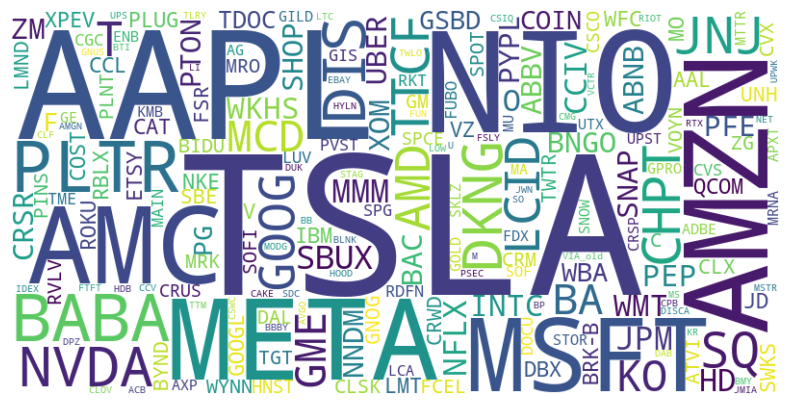

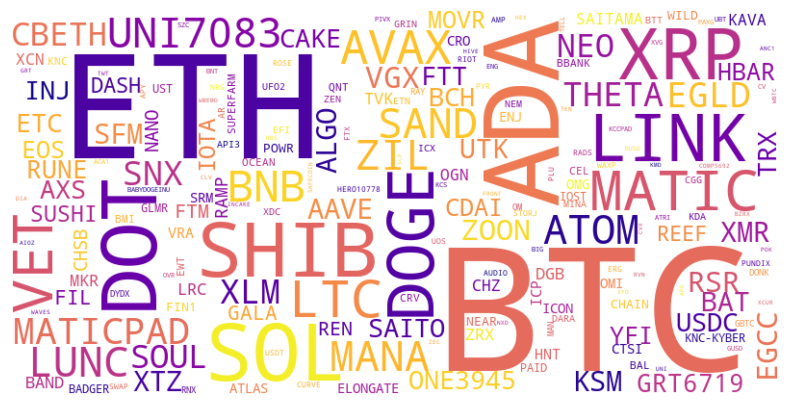

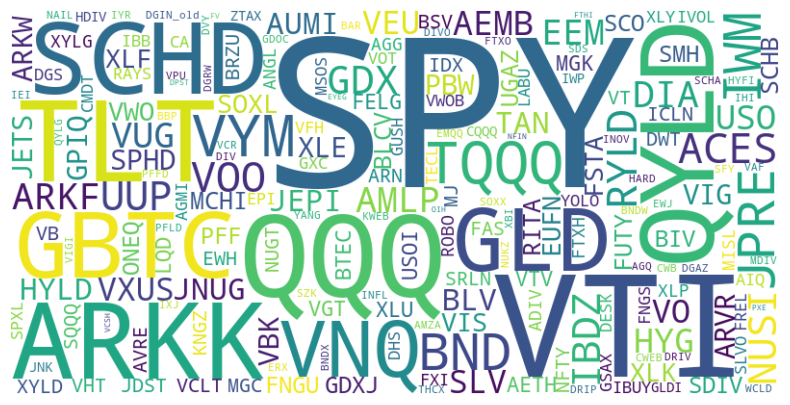

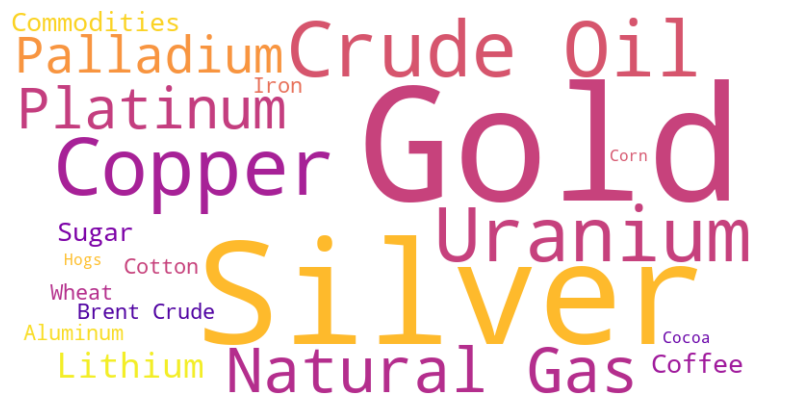

In [2]:
# word clouds
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def get_word_cloud(df, name_col='ticker', 
                   count_col='count', 
                   width=800, 
                   height=400, 
                   background_color='white',
                   colormap='viridis'):
    # need df as dict
    ticker_freq = dict(zip(df[name_col], df[count_col]))
    wordcloud = WordCloud(width=width, 
                          height=height, 
                          background_color=background_color,
                          colormap=colormap).generate_from_frequencies(ticker_freq)
    # plot
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    
    return fig

fig = get_word_cloud(all_stocks, name_col='ticker', colormap='viridis')

plt.show()
fig = get_word_cloud(all_cryptos, name_col='ticker', colormap='plasma')

plt.show()
fig = get_word_cloud(all_etfs, name_col='ticker', colormap='viridis')

plt.show()
fig = get_word_cloud(all_commodities, name_col='Name', colormap='plasma')


In [4]:
all_stocks.head(20)

,ticker,count,Code,Name
0,TSLA,1505,TSLA,Tesla Inc
1,AAPL,825,AAPL,Apple Inc
2,NIO,709,NIO,Nio Inc Class A ADR
3,AMZN,468,AMZN,Amazon.com Inc
4,META,438,META,Meta Platforms Inc.
5,AMC,395,AMC,AMC Entertainment Holdings Inc
6,MSFT,357,MSFT,Microsoft Corporation
7,PLTR,353,PLTR,Palantir Technologies Inc
8,BABA,344,BABA,Alibaba Group Holding Ltd
9,DIS,276,DIS,Walt Disney Company


### Return, Performance and Risk Metrics

- Only looking at one parameter combination: 1yr holding period, no max pos limit, SPY as neutral asset

In [7]:
# compute perf. and risk measures for SPY benchmark (full period)
import pandas as pd
import sys
sys.path.append("../")
from analysis import portfolio_utils as pfu
# load benchmark data
benchmark = pd.read_csv("../data/asset_data/returns/benchmarks_returns.csv", sep=";").set_index("date")
spy = benchmark["SPY"]
tbills = benchmark["3m_tbills"]
# compute metrics
spy_total_return_full = pfu.total_return(spy)
spy_sharpe_full = pfu.sharpe_ratio(spy, tbills)
spy_sortino_full = pfu.sortino_ratio(spy, tbills, 0)
# for var need to drop first observation (no return for first day)
spy_var5_full = pfu.value_at_risk(spy[1:], 0.05)
# get index values from spy returns
spy_mdd_full = pfu.max_drawdown((1 + spy).cumprod())
print(f"SPY full period: TR: {spy_total_return_full} Sharpe: {spy_sharpe_full}, Sortino: {spy_sortino_full}, VaR 5%: {spy_var5_full}, MDD: {spy_mdd_full}")

# load portfolio stats 
df = pd.read_csv("../data/portfolios/portfolio_stats.csv", sep=";")
# subset
run_name = "equal_weight_SPY_hp252_wait1_pos99999"
df = df[df["run_name"] == run_name]
#print(df.shape)
#print(df.columns)

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter, FixedLocator
import matplotlib as mpl

custom = {"axes.edgecolor": "black"}
sns.set_style("whitegrid", rc=custom)
mpl.rcParams.update({
    'font.family': 'Times New Roman',
    'font.size': 8,  # Global font size for text elements
    'legend.fontsize': 8,
    'axes.titlesize': 10,  # Font size for axes titles
    'axes.labelsize': 8,  # Font size for x and y axis labels
    'xtick.labelsize': 8,  # Font size for x-axis tick labels
    'ytick.labelsize': 8,  # Font size for y-axis tick labels
})

SPY full period: TR: 1.722557966093241 Sharpe: 0.0435057780853769, Sortino: 0.06665911479216598, VaR 5%: 0.01760265882667105, MDD: 0.3371737415848322


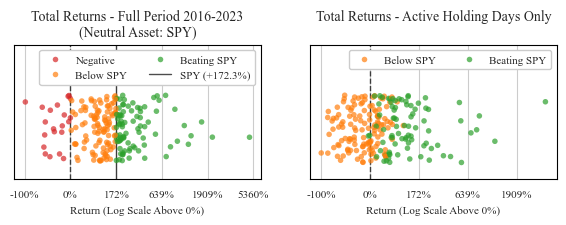

In [8]:

# helper/formatting functions
def log_return(x):
    return np.log(x + 1)

def custom_return_formatter(x, pos): # linear returns below 0, convert log returns above 0
    if x <= 0:
        return f'{x * 100:.0f}%'
    else:
        return f'{(np.exp(x) - 1) * 100:.0f}%'


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 1.75), sharey=False)
### left: total return full period
# hue
df["TRF_hue"] = df["total_return_full"].apply(lambda x: "A" if x <= 0 else "B" if x <= spy_total_return_full else "C")
# transform to log returns (if above 0, otherwise keep original)
df["TRF_data"] = df["total_return_full"].apply(lambda x: log_return(x) if x >= 0 else x)
sns.stripplot(data=df, x="TRF_data", hue="TRF_hue", hue_order=["A", "B", "C"],
                   jitter=0.2, s=4, log_scale=False, alpha=0.7,
                   palette=sns.color_palette(["tab:red", "tab:orange", "tab:green"]), legend=True, ax=ax1)

# vlines
spy_transformed = log_return(spy_total_return_full) if spy_total_return_full > 0 else spy_total_return_full
ax1.axvline(spy_transformed, color="black", linestyle="-", label="asdf", alpha=0.7, lw=1)
ax1.axvline(0, color="black", linestyle="--", alpha=0.7, lw=1)

# labels
ax1.set_xlabel("Return (Log Scale Above 0%)")
ax1.set_title("Total Returns - Full Period 2016-2023\n(Neutral Asset: SPY)")
# legend labels
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(ncol=2, handles=handles, framealpha=1.0, labels=['Negative', 'Below SPY', 'Beating SPY', f"SPY (+{spy_total_return_full*100:.1f}%)"], title=None, loc="upper right")

# formatter
ax1.xaxis.set_major_formatter(FuncFormatter(custom_return_formatter))

### right: total return active days only
# hue: beating spy in active period?
df["TRA_hue"] = df["total_excess_return_active_days"].apply(lambda x: "A" if x <= 0 else "B" )
# transform to log returns (if above 0, otherwise keep original)
df["TRA_data"] = df["total_return_active_days"].apply(lambda x: log_return(x) if x >= 0 else x)
sns.stripplot(data=df, x="TRA_data", hue="TRA_hue", hue_order=["A", "B"],
                   jitter=0.2, s=4, log_scale=False, alpha=0.7,
                   palette=sns.color_palette(["tab:orange", "tab:green"]), legend=True, ax=ax2)

# vlines
ax2.axvline(0, color="black", linestyle="--", alpha=0.7, lw=1)

# labels
ax2.set_xlabel("Return (Log Scale Above 0%)")
ax2.set_title("Total Returns - Active Holding Days Only\n")
# legend labels
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles=handles, labels=['Below SPY', 'Beating SPY'], title=None, loc="upper right", framealpha=1.0, ncol=2)

# formatter
ax2.xaxis.set_major_formatter(FuncFormatter(custom_return_formatter))
#plt.subplots_adjust(top=0.85) 
for ax in [ax1, ax2]:
    ylim = ax.get_ylim()
    ax.set_ylim(ylim[0] -0.2, ylim[1])
plt.show()
# save
fig.savefig(f"plots/pf_total_return.png", dpi=600, bbox_inches="tight")

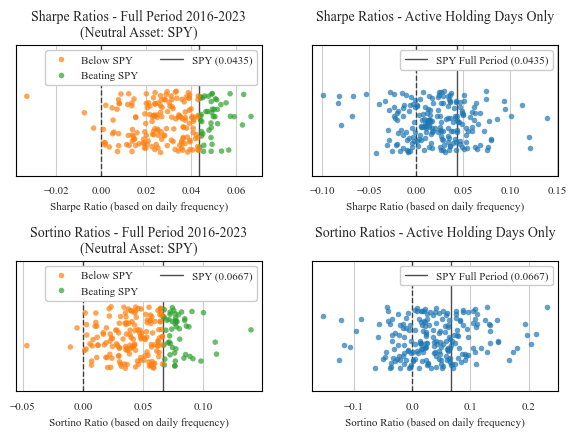

In [9]:
### Performance Measures

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(7, 4.5), sharey=False)
### left: total return full period
# hue
df["SHF_hue"] = df["sharpe_full"].apply(lambda x: "B" if x <= spy_sharpe_full else "C")
sns.stripplot(data=df, x="sharpe_full", hue="SHF_hue", hue_order=["B", "C"],
                   jitter=0.2, s=4, alpha=0.7,
                   palette=sns.color_palette(["tab:orange", "tab:green"]), legend=True, ax=ax1)

ax1.axvline(spy_sharpe_full, color="black", linestyle="-", label="asdf", alpha=0.7, lw=1)
ax1.axvline(0, color="black", linestyle="--", alpha=0.7, lw=1)
# labels
ax1.set_xlabel("Sharpe Ratio (based on daily frequency)")
ax1.set_title("Sharpe Ratios - Full Period 2016-2023\n(Neutral Asset: SPY)")
# legend labels
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles=handles, framealpha=1.0, labels=['Below SPY', 'Beating SPY', f"SPY ({spy_sharpe_full:.4f})"], title=None, loc="upper right", ncol=2)


# hue
#df["SHA_hue"] = df["sharpe_active_days"].apply(lambda x: "A" if x <= 0 else "B" )
sns.stripplot(data=df, x="sharpe_active_days", #hue="SHA_hue", hue_order=["A", "B"],
                   jitter=0.2, s=4, alpha=0.7, color="tab:blue",
                   #palette=sns.color_palette(["tab:red", "tab:blue"]), 
                   legend=True, ax=ax2)

# vlines
ax2.axvline(spy_sharpe_full, color="black", linestyle="-", alpha=0.7, lw=1, label="asdf")
ax2.axvline(0, color="black", linestyle="--", alpha=0.7, lw=1)
# labels
ax2.set_xlabel("Sharpe Ratio (based on daily frequency)")
ax2.set_title("Sharpe Ratios - Active Holding Days Only\n")
# legend labels
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles=handles, labels=[f'SPY Full Period ({spy_sharpe_full:.4f})'], title=None, loc="upper right", framealpha=1.0, ncol=2)

## Sortinos 
df["SOF_hue"] = df["sortino_full"].apply(lambda x: "B" if x <= spy_sortino_full else "C")
sns.stripplot(data=df, x="sortino_full", hue="SOF_hue", hue_order=["B", "C"],
                   jitter=0.2, s=4, alpha=0.7,
                   palette=sns.color_palette(["tab:orange", "tab:green"]), legend=True, ax=ax3)

ax3.axvline(spy_sortino_full, color="black", linestyle="-", label="asdf", alpha=0.7, lw=1)
ax3.axvline(0, color="black", linestyle="--", alpha=0.7, lw=1)
# labels
ax3.set_xlabel("Sortino Ratio (based on daily frequency)")
ax3.set_title("Sortino Ratios - Full Period 2016-2023\n(Neutral Asset: SPY)")
# legend labels
handles, labels = ax1.get_legend_handles_labels()
ax3.legend(handles=handles, framealpha=1.0, labels=['Below SPY','Beating SPY', f"SPY ({spy_sortino_full:.4f})"], title=None, loc="upper right", ncol=2)


#df["SHA_hue"] = df["sharpe_full"].apply(lambda x: "A" if x <= 0 else "B" )
sns.stripplot(data=df, x="sortino_active_days", #hue="SHA_hue", hue_order=["A", "B"],
                   jitter=0.2, s=4, alpha=0.7, color="tab:blue",
                   #palette=sns.color_palette(["tab:red", "tab:blue"]), 
                   legend=True, ax=ax4)

# vlines
ax4.axvline(spy_sortino_full, color="black", linestyle="-", alpha=0.7, lw=1, label="asdf")
ax4.axvline(0, color="black", linestyle="--", alpha=0.7, lw=1)
# labels
ax4.set_xlabel("Sortino Ratio (based on daily frequency)")
ax4.set_title("Sortino Ratios - Active Holding Days Only\n")
# legend labels
handles, labels = ax4.get_legend_handles_labels()
ax4.legend(handles=handles, labels=[f'SPY Full Period ({spy_sortino_full:.4f})'], title=None, loc="upper right", framealpha=1.0, ncol=2)

#plt.subplots_adjust(top=0.85) 
for ax in [ax1, ax2, ax3, ax4]:
    ylim = ax.get_ylim()
    ax.set_ylim(ylim[0]-0.15, ylim[1])
fig.subplots_adjust(hspace=0.65)
plt.show()
# save
fig.savefig(f"plots/pf_perf_metrics.png", dpi=600, bbox_inches="tight")

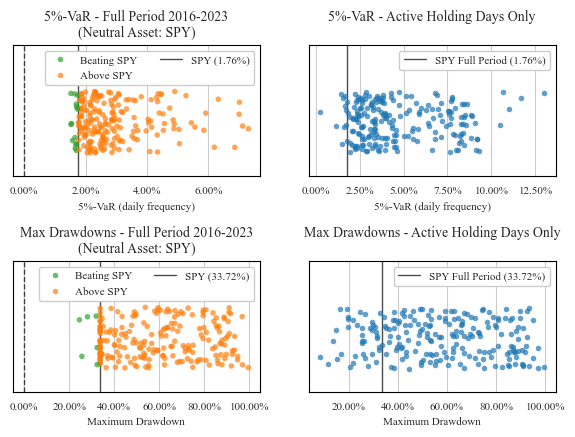

In [10]:
### Risk Metrics

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(7, 4.5), sharey=False)

# custom formatter for VaR and MDD (percentages)
def custom_risk_formatter(x, pos):
    return f'{x * 100:.2f}%'

# hue
df["VARF_hue"] = df["value_at_risk_full"].apply(lambda x: "C" if x >= spy_var5_full else "B")
sns.stripplot(data=df, x="value_at_risk_full", hue="VARF_hue", hue_order=["B", "C"],
                   jitter=0.2, s=4, alpha=0.7,
                   palette=sns.color_palette(["tab:green", "tab:orange"]), legend=True, ax=ax1)

ax1.axvline(spy_var5_full, color="black", linestyle="-", label="asdf", alpha=0.7, lw=1)
ax1.axvline(0, color="black", linestyle="--", alpha=0.7, lw=1)
ax1.set_xlabel("5%-VaR (daily frequency)")
ax1.set_title("5%-VaR - Full Period 2016-2023\n(Neutral Asset: SPY)")
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles=handles, framealpha=1.0, labels=['Beating SPY', 'Above SPY', f"SPY ({spy_var5_full*100:.2f}%)"], title=None, loc="upper right", ncol=2)
ax1.xaxis.set_major_formatter(FuncFormatter(custom_risk_formatter))

### right: total return active days only

sns.stripplot(data=df, x="value_at_risk_active_days", #hue="SHA_hue", hue_order=["A", "B"],
                   jitter=0.2, s=4, alpha=0.7, color="tab:blue",
                   #palette=sns.color_palette(["tab:red", "tab:blue"]), 
                   legend=True, ax=ax2)
ax2.axvline(spy_var5_full, color="black", linestyle="-", alpha=0.7, lw=1, label="asdf")
ax2.set_xlabel("5%-VaR (daily frequency)")
ax2.set_title("5%-VaR - Active Holding Days Only\n")
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles=handles, labels=[f'SPY Full Period ({spy_var5_full*100:.2f}%)'], title=None, loc="upper right", framealpha=1.0, ncol=2)
ax2.xaxis.set_major_formatter(FuncFormatter(custom_risk_formatter))

## MDDs 
df["MDDF_hue"] = df["max_drawdown_full"].apply(lambda x: "C" if x >= spy_mdd_full else "B")
sns.stripplot(data=df, x="max_drawdown_full", hue="MDDF_hue", hue_order=["B", "C"],
                   jitter=0.2, s=4, alpha=0.7,
                   palette=sns.color_palette(["tab:green", "tab:orange"]), legend=True, ax=ax3)

ax3.axvline(spy_mdd_full, color="black", linestyle="-", label="asdf", alpha=0.7, lw=1)
ax3.axvline(0, color="black", linestyle="--", alpha=0.7, lw=1)
ax3.set_xlabel("Maximum Drawdown")
ax3.set_title("Max Drawdowns - Full Period 2016-2023\n(Neutral Asset: SPY)")
handles, labels = ax3.get_legend_handles_labels()
ax3.legend(handles=handles, framealpha=1.0, labels=['Beating SPY', 'Above SPY', f"SPY ({spy_mdd_full*100:.2f}%)"], title=None, loc="upper right", ncol=2)
ax3.xaxis.set_major_formatter(FuncFormatter(custom_risk_formatter))

#df["MDDF_hue"] = df["max_drawdown_active_days"].apply(lambda x: "B" if x >= spy_mdd_full else "C")
sns.stripplot(data=df, x="max_drawdown_active_days", #hue="SHA_hue", hue_order=["A", "B"],
                   jitter=0.2, s=4, alpha=0.7, color="tab:blue",
                   #palette=sns.color_palette(["tab:red", "tab:blue"]), 
                   legend=True, ax=ax4)

# vlines
ax4.axvline(spy_mdd_full, color="black", linestyle="-", alpha=0.7, lw=1, label="asdf")
# labels
ax4.set_xlabel("Maximum Drawdown")
ax4.set_title("Max Drawdowns - Active Holding Days Only\n")
# legend labels
handles, labels = ax4.get_legend_handles_labels()
ax4.legend(handles=handles, labels=[f'SPY Full Period ({spy_mdd_full*100:.2f}%)'], title=None, loc="upper right", framealpha=1.0, ncol=2)
ax4.xaxis.set_major_formatter(FuncFormatter(custom_risk_formatter))

#plt.subplots_adjust(top=0.85) 
for ax in [ax1, ax2, ax3, ax4]:
    ylim = ax.get_ylim()
    ax.set_ylim(ylim[0]-0.15, ylim[1])
fig.subplots_adjust(hspace=0.65)
plt.show()
# save
fig.savefig(f"plots/pf_risk_metrics.png", dpi=600, bbox_inches="tight")

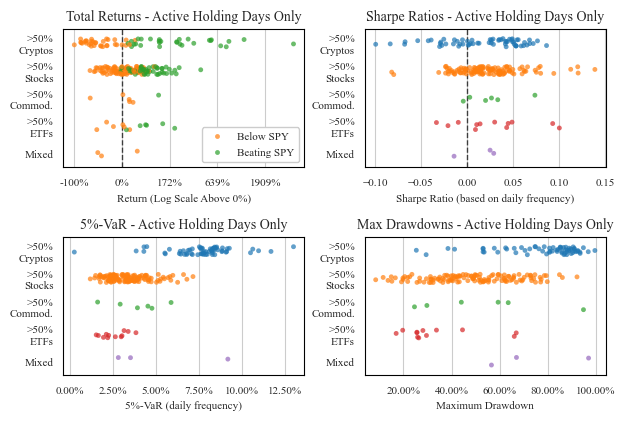

In [11]:

# active days only, by asseet type: total return, sharpe, var, max drawdown
th = 0.5
# define asset_type_focus of portfolio
df["asset_type_focus"] = df.apply(lambda x: 
                                     ">50%\nStocks" if x["n_buys_stocks"] >= th * x["n_buys"] 
                                else ">50%\nCryptos" if x["n_buys_cryptos"] >= th * x["n_buys"] 
                                else ">50%\nETFs" if x["n_buys_etfs"] >= th * x["n_buys"] 
                                else ">50%\nCommod." if x["n_buys_commodities"] >= th * x["n_buys"] 
                                else "Mixed", axis=1)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(7, 4.5), sharey=False)

### total excess return (with partial log scale)
df["TRA_hue"] = df["total_excess_return_active_days"].apply(lambda x: "A" if x <= 0 else "B" )
# transform to log returns (if above 0, otherwise keep original)
df["TRA_data"] = df["total_return_active_days"].apply(lambda x: log_return(x) if x >= 0 else x)
sns.stripplot(data=df, x="TRA_data", y="asset_type_focus", hue="TRA_hue", hue_order=["A", "B"],
                   jitter=0.15, s=3.5, log_scale=False, alpha=0.7,
                   palette=sns.color_palette(["tab:orange", "tab:green"]), legend=True, ax=ax1)

ax1.axvline(0, color="black", linestyle="--", alpha=0.7, lw=1)
ax1.set_xlabel("Return (Log Scale Above 0%)")
ax1.set_title("Total Returns - Active Holding Days Only")
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles=handles, labels=['Below SPY', 'Beating SPY'], title=None, loc="lower right", framealpha=1.0, ncol=1)
ax1.set_ylabel("")
ax1.xaxis.set_major_formatter(FuncFormatter(custom_return_formatter))

### sharpe
sns.stripplot(data=df, x="sharpe_active_days", y="asset_type_focus", hue="asset_type_focus",#hue="SHA_hue", hue_order=["A", "B"],
                   jitter=0.15, s=3.5, alpha=0.7, #color="tab:blue",
                   #palette=sns.color_palette(["tab:red", "tab:blue"]), 
                   legend=False, ax=ax2)

#ax2.axvline(spy_sharpe_full, color="black", linestyle="-", alpha=0.7, lw=1, label="asdf")
ax2.axvline(0, color="black", linestyle="--", alpha=0.7, lw=1)
ax2.set_xlabel("Sharpe Ratio (based on daily frequency)")
ax2.set_title("Sharpe Ratios - Active Holding Days Only")
ax2.set_ylabel("")
handles, labels = ax2.get_legend_handles_labels()
#ax2.legend(handles=handles, labels=[f'SPY Full Period ({spy_sharpe_full:.4f})'], title=None, loc="upper right", framealpha=1.0, ncol=2)

### VaR
sns.stripplot(data=df, x="value_at_risk_active_days", y="asset_type_focus", hue="asset_type_focus", #hue="SHA_hue", hue_order=["A", "B"],
                   jitter=0.15, s=3.5, alpha=0.7, #color="tab:blue",
                   #palette=sns.color_palette(["tab:red", "tab:blue"]), 
                   legend=False, ax=ax3)
ax3.set_xlabel("5%-VaR (daily frequency)")
ax3.set_title("5%-VaR - Active Holding Days Only")
ax3.set_ylabel("")
handles, labels = ax3.get_legend_handles_labels()
#ax3.legend(handles=handles, labels=[f'SPY Full Period ({spy_var5_full*100:.2f}%)'], title=None, loc="upper right", framealpha=1.0, ncol=2)
ax3.xaxis.set_major_formatter(FuncFormatter(custom_risk_formatter))

### MDD
#df["MDDF_hue"] = df["max_drawdown_active_days"].apply(lambda x: "B" if x >= spy_mdd_full else "C")
sns.stripplot(data=df, x="max_drawdown_active_days", y="asset_type_focus", hue="asset_type_focus", #hue_order=["A", "B"],
                   jitter=0.15, s=3.5, alpha=0.7, #color="tab:blue",
                   #palette=sns.color_palette(["tab:blue", "tab:purple", ""])
                   #palette=sns.color_palette(["tab:red", "tab:blue"]), 
                   legend=False, ax=ax4)

# vlines
#ax4.axvline(spy_mdd_full, color="black", linestyle="-", alpha=0.7, lw=1, label="asdf")
# labels
ax4.set_xlabel("Maximum Drawdown")
ax4.set_title("Max Drawdowns - Active Holding Days Only")
ax4.set_ylabel("")
# legend labels
handles, labels = ax4.get_legend_handles_labels()
#ax4.legend(handles=handles, labels=[f'SPY Full Period ({spy_mdd_full*100:.2f}%)'], title=None, loc="upper right", framealpha=1.0, ncol=2)
ax4.xaxis.set_major_formatter(FuncFormatter(custom_risk_formatter))


for ax in [ax1, ax2, ax3, ax4]:
    ylim = ax.get_ylim()
    ax.set_ylim(ylim[0], ylim[1])
fig.subplots_adjust(hspace=0.5)
fig.subplots_adjust(wspace=0.25)
plt.show()
# save
fig.savefig(f"plots/pf_metrics_by_asset_type.png", dpi=600, bbox_inches="tight")


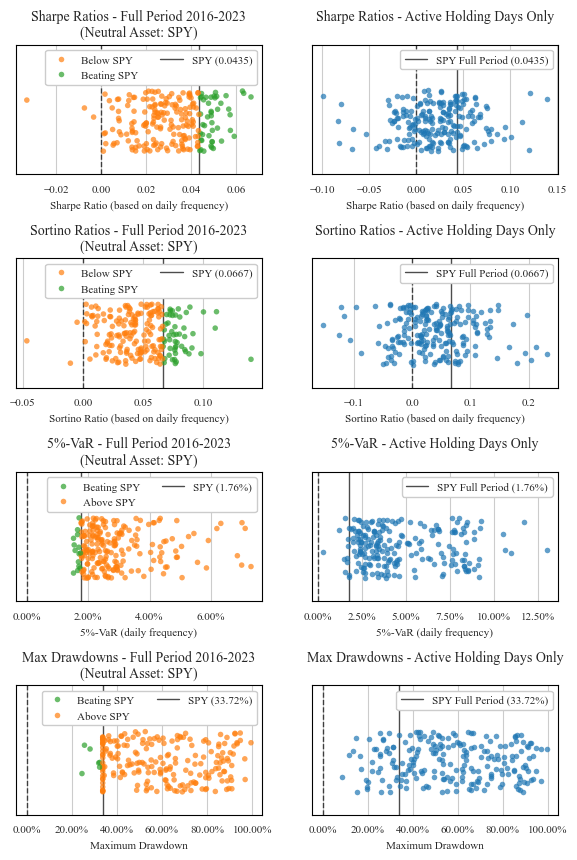

In [15]:
### Alternative for better formatting in thesis: performance and risk metrics in one plot

### Performance Measures

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(7, 10), sharey=False)
### left: total return full period
# hue
df["SHF_hue"] = df["sharpe_full"].apply(lambda x: "B" if x <= spy_sharpe_full else "C")
sns.stripplot(data=df, x="sharpe_full", hue="SHF_hue", hue_order=["B", "C"],
                   jitter=0.2, s=4, alpha=0.7,
                   palette=sns.color_palette(["tab:orange", "tab:green"]), legend=True, ax=ax1)

ax1.axvline(spy_sharpe_full, color="black", linestyle="-", label="asdf", alpha=0.7, lw=1)
ax1.axvline(0, color="black", linestyle="--", alpha=0.7, lw=1)
# labels
ax1.set_xlabel("Sharpe Ratio (based on daily frequency)")
ax1.set_title("Sharpe Ratios - Full Period 2016-2023\n(Neutral Asset: SPY)")
# legend labels
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles=handles, framealpha=1.0, labels=['Below SPY', 'Beating SPY', f"SPY ({spy_sharpe_full:.4f})"], title=None, loc="upper right", ncol=2)


# hue
#df["SHA_hue"] = df["sharpe_active_days"].apply(lambda x: "A" if x <= 0 else "B" )
sns.stripplot(data=df, x="sharpe_active_days", #hue="SHA_hue", hue_order=["A", "B"],
                   jitter=0.2, s=4, alpha=0.7, color="tab:blue",
                   #palette=sns.color_palette(["tab:red", "tab:blue"]), 
                   legend=True, ax=ax2)

# vlines
ax2.axvline(spy_sharpe_full, color="black", linestyle="-", alpha=0.7, lw=1, label="asdf")
ax2.axvline(0, color="black", linestyle="--", alpha=0.7, lw=1)
# labels
ax2.set_xlabel("Sharpe Ratio (based on daily frequency)")
ax2.set_title("Sharpe Ratios - Active Holding Days Only\n")
# legend labels
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles=handles, labels=[f'SPY Full Period ({spy_sharpe_full:.4f})'], title=None, loc="upper right", framealpha=1.0, ncol=2)

## Sortinos 
df["SOF_hue"] = df["sortino_full"].apply(lambda x: "B" if x <= spy_sortino_full else "C")
sns.stripplot(data=df, x="sortino_full", hue="SOF_hue", hue_order=["B", "C"],
                   jitter=0.2, s=4, alpha=0.7,
                   palette=sns.color_palette(["tab:orange", "tab:green"]), legend=True, ax=ax3)

ax3.axvline(spy_sortino_full, color="black", linestyle="-", label="asdf", alpha=0.7, lw=1)
ax3.axvline(0, color="black", linestyle="--", alpha=0.7, lw=1)
# labels
ax3.set_xlabel("Sortino Ratio (based on daily frequency)")
ax3.set_title("Sortino Ratios - Full Period 2016-2023\n(Neutral Asset: SPY)")
# legend labels
handles, labels = ax1.get_legend_handles_labels()
ax3.legend(handles=handles, framealpha=1.0, labels=['Below SPY','Beating SPY', f"SPY ({spy_sortino_full:.4f})"], title=None, loc="upper right", ncol=2)


#df["SHA_hue"] = df["sharpe_full"].apply(lambda x: "A" if x <= 0 else "B" )
sns.stripplot(data=df, x="sortino_active_days", #hue="SHA_hue", hue_order=["A", "B"],
                   jitter=0.2, s=4, alpha=0.7, color="tab:blue",
                   #palette=sns.color_palette(["tab:red", "tab:blue"]), 
                   legend=True, ax=ax4)

# vlines
ax4.axvline(spy_sortino_full, color="black", linestyle="-", alpha=0.7, lw=1, label="asdf")
ax4.axvline(0, color="black", linestyle="--", alpha=0.7, lw=1)
# labels
ax4.set_xlabel("Sortino Ratio (based on daily frequency)")
ax4.set_title("Sortino Ratios - Active Holding Days Only\n")
# legend labels
handles, labels = ax4.get_legend_handles_labels()
ax4.legend(handles=handles, labels=[f'SPY Full Period ({spy_sortino_full:.4f})'], title=None, loc="upper right", framealpha=1.0, ncol=2)

### Risk Metrics

# custom formatter for VaR and MDD (percentages)
def custom_risk_formatter(x, pos):
    return f'{x * 100:.2f}%'

# hue
df["VARF_hue"] = df["value_at_risk_full"].apply(lambda x: "C" if x >= spy_var5_full else "B")
sns.stripplot(data=df, x="value_at_risk_full", hue="VARF_hue", hue_order=["B", "C"],
                   jitter=0.2, s=4, alpha=0.7,
                   palette=sns.color_palette(["tab:green", "tab:orange"]), legend=True, ax=ax5)

ax5.axvline(spy_var5_full, color="black", linestyle="-", label="asdf", alpha=0.7, lw=1)
ax5.axvline(0, color="black", linestyle="--", alpha=0.7, lw=1)
ax5.set_xlabel("5%-VaR (daily frequency)")
ax5.set_title("5%-VaR - Full Period 2016-2023\n(Neutral Asset: SPY)")
handles, labels = ax5.get_legend_handles_labels()
ax5.legend(handles=handles, framealpha=1.0, labels=['Beating SPY', 'Above SPY', f"SPY ({spy_var5_full*100:.2f}%)"], title=None, loc="upper right", ncol=2)
ax5.xaxis.set_major_formatter(FuncFormatter(custom_risk_formatter))

### right: total return active days only

sns.stripplot(data=df, x="value_at_risk_active_days", #hue="SHA_hue", hue_order=["A", "B"],
                   jitter=0.2, s=4, alpha=0.7, color="tab:blue",
                   #palette=sns.color_palette(["tab:red", "tab:blue"]), 
                   legend=True, ax=ax6)
ax6.axvline(spy_var5_full, color="black", linestyle="-", alpha=0.7, lw=1, label="asdf")
ax6.axvline(0, color="black", linestyle="--", alpha=0.7, lw=1)
ax6.set_xlabel("5%-VaR (daily frequency)")
ax6.set_title("5%-VaR - Active Holding Days Only\n")
handles, labels = ax6.get_legend_handles_labels()
ax6.legend(handles=handles, labels=[f'SPY Full Period ({spy_var5_full*100:.2f}%)'], title=None, loc="upper right", framealpha=1.0, ncol=2)
ax6.xaxis.set_major_formatter(FuncFormatter(custom_risk_formatter))

## MDDs 
df["MDDF_hue"] = df["max_drawdown_full"].apply(lambda x: "C" if x >= spy_mdd_full else "B")
sns.stripplot(data=df, x="max_drawdown_full", hue="MDDF_hue", hue_order=["B", "C"],
                   jitter=0.2, s=4, alpha=0.7,
                   palette=sns.color_palette(["tab:green", "tab:orange"]), legend=True, ax=ax7)

ax7.axvline(spy_mdd_full, color="black", linestyle="-", label="asdf", alpha=0.7, lw=1)
ax7.axvline(0, color="black", linestyle="--", alpha=0.7, lw=1)
ax7.set_xlabel("Maximum Drawdown")
ax7.set_title("Max Drawdowns - Full Period 2016-2023\n(Neutral Asset: SPY)")
handles, labels = ax7.get_legend_handles_labels()
ax7.legend(handles=handles, framealpha=1.0, labels=['Beating SPY', 'Above SPY', f"SPY ({spy_mdd_full*100:.2f}%)"], title=None, loc="upper right", ncol=2)
ax7.xaxis.set_major_formatter(FuncFormatter(custom_risk_formatter))

#df["MDDF_hue"] = df["max_drawdown_active_days"].apply(lambda x: "B" if x >= spy_mdd_full else "C")
sns.stripplot(data=df, x="max_drawdown_active_days", #hue="SHA_hue", hue_order=["A", "B"],
                   jitter=0.2, s=4, alpha=0.7, color="tab:blue",
                   #palette=sns.color_palette(["tab:red", "tab:blue"]), 
                   legend=True, ax=ax8)

# vlines
ax8.axvline(spy_mdd_full, color="black", linestyle="-", alpha=0.7, lw=1, label="asdf")
ax8.axvline(0, color="black", linestyle="--", alpha=0.7, lw=1)
# labels
ax8.set_xlabel("Maximum Drawdown")
ax8.set_title("Max Drawdowns - Active Holding Days Only\n")
# legend labels
handles, labels = ax8.get_legend_handles_labels()
ax8.legend(handles=handles, labels=[f'SPY Full Period ({spy_mdd_full*100:.2f}%)'], title=None, loc="upper right", framealpha=1.0, ncol=2)
ax8.xaxis.set_major_formatter(FuncFormatter(custom_risk_formatter))

#plt.subplots_adjust(top=0.85) 
for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]:
    ylim = ax.get_ylim()
    ax.set_ylim(ylim[0]-0.15, ylim[1])
fig.subplots_adjust(hspace=0.65)
plt.show()
# save
fig.savefig(f"plots/pf_perf_risk_4x2.png", dpi=600, bbox_inches="tight")

###